label_dict不要去動，有新資料更新以out.csv做更動

In [ ]:
import csv
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import f1_score as f1
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import plot_confusion_matrix as pcm
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.ensemble import AdaBoostClassifier as ada
from sklearn.neural_network import MLPClassifier as nn
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.feature_selection import SelectKBest
from sklearn.feature_extraction.text import HashingVectorizer 
from sklearn.feature_selection import SelectFromModel as sfm
from sklearn.model_selection import GridSearchCV as gcv 

# 欲測試Hashing Vectorize之code

In [ ]:
with open("/content/drive/MyDrive/Colab_Notebooks/sample10000/label_dict.pkl", 'rb') as f:
	label_dict = pickle.load(f)

with open("/content/drive/MyDrive/Colab_Notebooks/sample10000/out.csv", 'r') as f:
  data = csv.reader(f)
  data = list(data)

#print(data[0])
"""
label = []
i = 0
while i != len(data):
  text = data[i][-1][2:-2]
  if text in label_dict:
    label.append(label_dict[text])
    data[i].pop(-1)
    i += 1
  else:
    data.pop(i)
 
document = []
for d in data:
  temp = ''
  for t in d:
    temp += t + ' '
  document.append(temp)
"""
#print(document[0])
#print(data[0])
#print(label[0])
#print(len(data[0]))

label = []
i = 0
while i != len(data):
  text = data[i][-1]
  if text in label_dict:
    label.append(label_dict[text])
    data[i].pop(-1)
    i += 1
  else:
    data.pop(i)

document = []
for d in data:
  temp = ''
  for t in d:
    temp += t + ' '
  document.append(temp)


In [ ]:
vectorizer = HashingVectorizer(ngram_range = (5, 5))
x = vectorizer.fit_transform(document)
#print(x[:5])

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x, label)
clf = rfc(n_estimators = 200, n_jobs = -1).fit(xtrain, ytrain)
prediction = clf.predict(xtest)
score_acc = acc(prediction, ytest)
score_f1 = f1(prediction, ytest, average = 'macro')

print(f"The acc of rfc with hashing: {score_acc}")
print(f"The f1 of rfc with hashing: {score_f1}")

selector = sfm(estimator = clf).fit(xtrain, ytrain).transform(xtrain)
print(selector[0])
#func+iter1 acc = 0.9663140520669218, f1 = 0.9200828740232339
#iter1+iter2 acc = 0.9523220046515117, f1 = 0.9319793533948253

The acc of rfc with hashing: 0.9618501012829169
The f1 of rfc with hashing: 0.8290819762514394




```
# 此內容會顯示為程式碼
```

# Doc2vec code


In [ ]:
#training data
#['filename', 'feature'...]

with open("/content/drive/MyDrive/Colab_Notebooks/sample10000/out_bak.csv", 'r') as f:
	data = csv.reader(f)
	data = list(data)

with open("/content/drive/MyDrive/Colab_Notebooks/sample10000/label_dict.pkl", 'rb') as f:
	label_dict = pickle.load(f)

label = []

for d in data:
  label.append(label_dict[d[0]])


for i in range(len(data)):
  #print(i)
  data[i].pop(0)
  data[i] = list(map(float, data[i]))

for i in range(10):
  print(str(i) + ": " + str(label.count(i)))

for i in range(len(label)):
  if i >= len(label):
    break
  if label[i] == 3 or label[i] == 6:
    label.pop(i)
    data.pop(i)

for i in range(10):
  print(str(i) + ": " + str(label.count(i)))

"""
for i in range(10):
  print(label.count(i))

print("----------------------------------------------------------------------------")

delete = []
for i in range(len(label)):
  if(label[i] == 6):
    delete.append(i)

delete.reverse()  
for i in delete:
  label.pop(i)
  data.pop(i)

for i in range(10):
  print(label.count(i))
  #第8類沒東西
  #第6類最少(17)
"""
labels = [1,2,3,4,5,6,7,9]
label = np.array(label)
data = np.array(data)

#print(label)


0: 0
1: 50043
2: 2299
3: 10
4: 1212
5: 43158
6: 458
7: 4585
8: 0
9: 4853
0: 0
1: 50043
2: 2299
3: 0
4: 1212
5: 43158
6: 0
7: 4585
8: 0
9: 4853


In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(data, label, train_size = 0.8)
#data = SelectKBest(k = 50).fit(data, label)

In [ ]:
parameters = {
  'n_estimators' : [100, 200],
  'criterion' : ['gini', 'entropy'],
  'n_jobs' : [-1],
  'max_features' : ['sqrt', 'log2', 30, 0.3, None]
}

model = rfc()
clf = gcv(estimator = model, param_grid = parameters, n_jobs = -1, cv = 5)
clf.fit(xtrain, ytrain)

prediction = clf.predict(xtest)
print("RandomForest with kfold acc score = 10's score:" + str(acc(ytest, prediction)))
print("RandomForest with kfold f1 score: " + str(f1(ytest, prediction, average = 'macro')))

print(f'best estimator: {clf.best_estimator_}')
print(f'best params: {clf.best_params_}')

selector = sfm(estimator = clf).fit(xtrain, ytrain).transform(xtrain)
print(selector[0])

"""
pcm(clf, xtest, ytest, values_format = 'd')
plt.title("kfold=10 with randomforest")
plt.show()
print(cm(ytest, prediction))
"""

In [ ]:
from sklearn.svm import SVC

clf = SVC(kernel = 'poly').fit(xtrain, ytrain)
pred = clf.predict(xtest)
print("SVC acc score = 10's score:" + str(acc(ytest, prediction)))
print("SVC kfold f1 score: " + str(f1(ytest, prediction, average = 'macro')))

selector = sfm(estimator = clf).fit(xtrain, ytrain).transform(xtrain)
print(selector[0])

SVC acc score = 10's score:0.9661799340555818
SVC kfold f1 score: 0.9499454271828621


ValueError: ignored

3 KNN's acc score:0.9732925105982101
3 KNN's f1 score: 0.9621410068480541


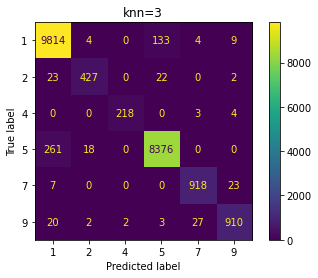

4 KNN's acc score:0.9739990579368818
4 KNN's f1 score: 0.9643507655118676


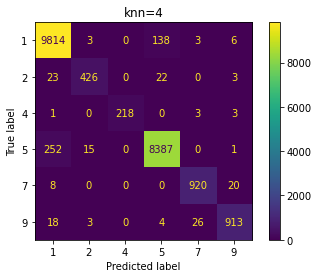

5 KNN's acc score:0.9735280263777674
5 KNN's f1 score: 0.96408614789885


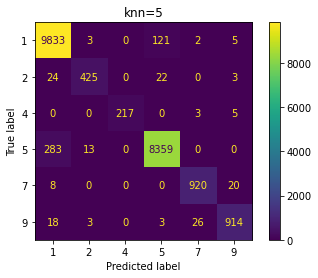

6 KNN's acc score:0.9735280263777674
6 KNN's f1 score: 0.9622100840867134


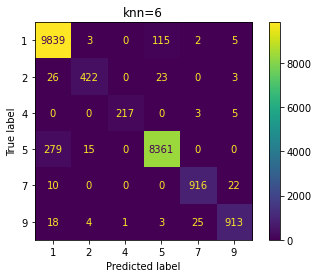

7 KNN's acc score:0.9728214790390957
7 KNN's f1 score: 0.962151897340009


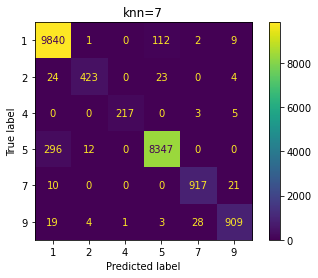

8 KNN's acc score:0.9732925105982101
8 KNN's f1 score: 0.9628374682594063


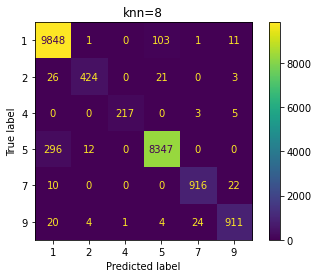

9 KNN's acc score:0.9716439001413094
9 KNN's f1 score: 0.9597504581827052


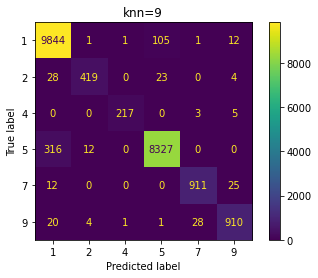

In [ ]:
#KNN
for n in range(3, 10):
  clf = knn(n_neighbors = n, weights = 'distance',n_jobs = -1).fit(xtrain, ytrain)
  prediction = clf.predict(xtest)
  print(str(n) + " KNN's acc score:" + str(acc(ytest, prediction)))
  print(str(n) + " KNN's f1 score: " + str(f1(ytest, prediction, average = 'macro')))

  pcm(clf, xtest, ytest, values_format = 'd')
  plt.title("knn=" + str(n))
  plt.show()